In [1]:
import re
import struct
import numpy as np
from skimage import exposure

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
WORD_SIZE = 4
LINE_COUNT = 10240
LINE_SIZE = LINE_COUNT * WORD_SIZE
SKIP_BYTES = 741 * WORD_SIZE

In [106]:
image_1 = '20180710_165432_NOAA18.raw16'
image_2 = '20180715_015444_NOAA19.raw16'
image_3 = '20180717_125905_NOAA19.raw16'

with open(image_3, 'rb') as f:
    text = f.read().hex()
    
header = text[:24]
spare_words = 'dd024e00c903'

#### Image Decoding

In [111]:
image = []
regex = re.compile(header)

for match in regex.finditer(text):
    spare_words_pos = match.end() + SKIP_BYTES
    spare_words_end = spare_words_pos + WORD_SIZE*3
    if text[spare_words_pos:spare_words_end] != spare_words:
        continue
    image_line = text[spare_words_end:spare_words_end+LINE_SIZE]
    image_line_values = np.array([struct.unpack('<H', bytes.fromhex(image_line[i*WORD_SIZE:(i+1)*WORD_SIZE]))[0] 
                                  for i in range(LINE_COUNT)])
    image.append(image_line_values.reshape((2048,5)))

image = np.array(image, dtype='uint16')

#### Image Enhancement

<IPython.core.display.Javascript object>


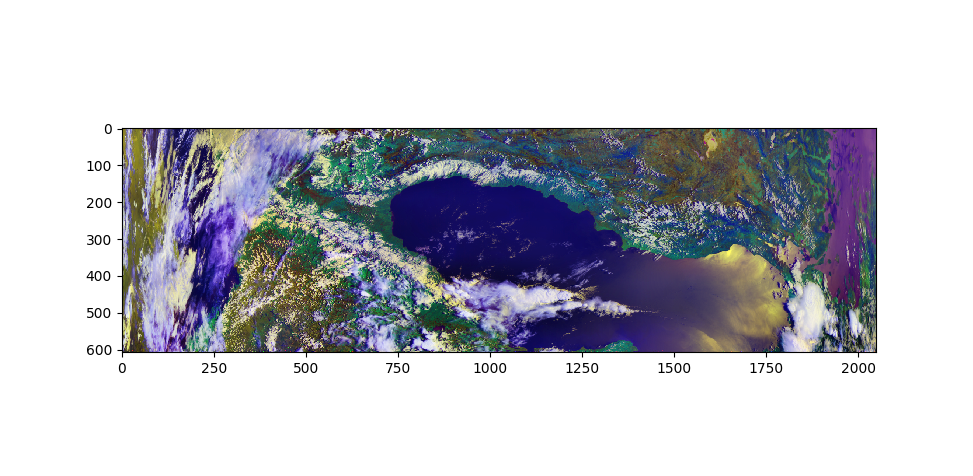

In [112]:
band_1 = exposure.equalize_adapthist(image[:,:,0])
band_2 = exposure.equalize_adapthist(image[:,:,1])
band_3 = exposure.equalize_adapthist(image[:,:,3])

color_image = np.stack([band_1, band_2, band_3], axis=2)

plt.imshow(color_image)
plt.show()

In [113]:
plt.imsave('result.png', color_image)